In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Combine the data into a single dataset
mouse_merged = pd.merge(mouse_metadata, study_results, how="outer", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_merged

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
unique_mice = mouse_merged["Mouse ID"].unique()
num_mice = len(unique_mice)
print(num_mice)

249


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mouse_merged[(mouse_merged.duplicated() == True)]
print(duplicates)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   

     Tumor Volume (mm3)  Metastatic Sites  
909                45.0                 0  


In [83]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_df = mouse_merged.set_index("Mouse ID")
mouse_df.loc["g989"]

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df = mouse_df.drop(["g989"])
df = df.reset_index()
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice in the clean DataFrame.
unique_mice2 = df["Mouse ID"].unique()
num_mice2 = len(unique_mice2)
print(num_mice2)

248


In [9]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_df = df.groupby("Drug Regimen")

# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
tumor_vol_mean = drug_df["Tumor Volume (mm3)"].mean()
tumor_vol_median = drug_df["Tumor Volume (mm3)"].median()
tumor_vol_var = drug_df["Tumor Volume (mm3)"].var()
tumor_vol_std = drug_df["Tumor Volume (mm3)"].std()
tumor_vol_sem = drug_df["Tumor Volume (mm3)"].sem()

drug_summary_df = pd.DataFrame({
    "Mean": tumor_vol_mean,
    "Median": tumor_vol_median,
    "Variance": tumor_vol_var,
    "Standard Deviation": tumor_vol_std,
    "Standard Error of Mean": tumor_vol_sem,
})
drug_summary_df

,Mean,Median,Variance,Standard Deviation,Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Using the aggregation method, produce the same summary statistics in a single line
drug_summary_df.aggregate(func='mean', axis=0)

Mean                      50.975982
Median                    49.902123
Variance                  47.858440
Standard Deviation         6.821103
Standard Error of Mean     0.502785
dtype: float64

Text(0, 0.5, 'Number of Data Readings')

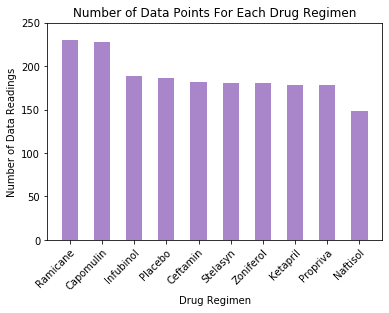

In [41]:
# Bar and Pie Charts
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

drug_regs = df["Drug Regimen"].unique()
drug_timepoint = df["Drug Regimen"].value_counts().plot.bar(color="C4", alpha=0.8)

drug_timepoint.set_ylim(0, 250)
drug_timepoint.set_xlim(-0.7,9.7)
drug_timepoint.set_title("Number of Data Points For Each Drug Regimen")
drug_timepoint.set_xlabel("Drug Regimen")
drug_timepoint.set_xticklabels(drug_regs,rotation=45, rotation_mode="anchor", ha="right", wrap=True)
drug_timepoint.set_ylabel("Number of Data Readings")

Text(0, 0.5, 'Number of Data Readings')

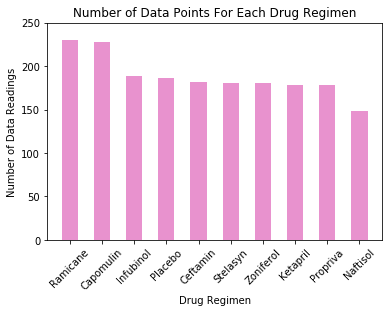

In [43]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoint = df["Drug Regimen"].value_counts()

plt.bar(drug_regs, timepoint, color='C6', alpha=0.8, align="center", width = 0.5)
plt.ylim(0,250)
plt.xlim(-0.7,9.7)
plt.xticks(rotation=45)
plt.title("Number of Data Points For Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Readings")

In [59]:
num_male = df.loc[df["Sex"] == "Male"]
num_female = df.loc[df["Sex"] == "Female"]
num = [len(num_male), len(num_female)]

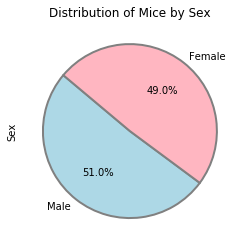

In [81]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count = df["Sex"].value_counts()
colors = ["lightblue", "lightpink"]
pie_plot = sex_count.plot.pie(autopct="%1.1f%%", startangle=140, title="Distribution of Mice by Sex", colors=colors,
            wedgeprops={"edgecolor":"grey",'linewidth': 2, 'antialiased': True})

([<matplotlib.patches.Wedge at 0x1a1eaa4320>,
 [Text(-0.821003013332154, -0.7320888280116856, 'Male'),
  Text(0.8210030133321538, 0.7320888280116858, 'Female')],
 [Text(-0.44781982545390214, -0.3993211789154648, '51.0%'),
  Text(0.447819825453902, 0.399321178915465, '49.0%')])

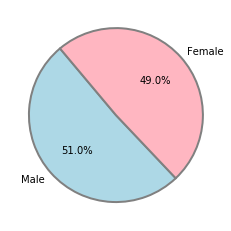

In [82]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
plt.pie(
    num, labels=labels, colors=colors, autopct="%1.1f%%", startangle=130,
    wedgeprops={"edgecolor":"grey",'linewidth': 2, 'antialiased': True}
)

In [274]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

mouseid = df.groupby(df["Mouse ID"]).max()
final_timepoints = mouseid["Timepoint"]
mouseid["Final Timepoint"] = final_timepoints
mouseid

# drugs_df = pd.DataFrame(df.loc[(df["Drug Regimen"] == "Ramicane")])
# final_timepoint = drugs_df.loc[(df["Timepoint"] == 45), :]
# ftv = final_timepoint["Tumor Volume (mm3)"]
# drugs_df["Final Tumor Volume"] = ftv
# drugs_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Final Timepoint
Mouse ID,,,,,,,,
a203,Infubinol,Female,20,23,45,67.973419,2,45
a251,Infubinol,Female,21,25,45,65.525743,1,45
a262,Placebo,Female,17,29,45,70.717621,4,45
a275,Ceftamin,Female,20,28,45,62.999356,3,45
a366,Stelasyn,Female,16,29,30,63.440686,1,30
...,...,...,...,...,...,...,...,...
z435,Propriva,Female,12,26,10,48.710661,0,10
z578,Ramicane,Male,11,16,45,45.000000,0,45
z581,Infubinol,Female,24,25,45,62.754451,3,45


In [277]:
# Put treatments into a list for for loop (and later for plot labels)

drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
new_mouse_df = pd.DataFrame(mouseid)
new_mouse_df.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Final Timepoint
Mouse ID,,,,,,,,
a203,Infubinol,Female,20,23,45,67.973419,2,45
a251,Infubinol,Female,21,25,45,65.525743,1,45
a262,Placebo,Female,17,29,45,70.717621,4,45
a275,Ceftamin,Female,20,28,45,62.999356,3,45
a366,Stelasyn,Female,16,29,30,63.440686,1,30


In [279]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
for drug in drugs:
    drug1 = new_mouse_df.loc[(new_mouse_df["Drug Regimen"] == drug)]
    tv = drug1["Tumor Volume (mm3)"]
    tumor_vol.append(tv)

In [ ]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1edc6550>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1edc6be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1edc6240>,
 'medians': [<matplotlib.lines.Line2D at 0x1a1edd22b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a1edd25f8>,
 'means': []}

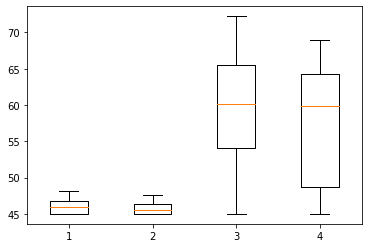

In [280]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol, notch=None, vert=None, patch_artist=None, widths=None)